In [17]:
#Specify the input filename
TRAINFILE=r"fake_news_train.csv"
TESTFILE=r"fake_news_test.csv"
#Specify the ratio of the data to subset for prediction
test_data_ratio = 0.05


#By default, TRAIN_MODEL is False and it uses pretrained model(fakenewsmodel.pkl). 
#If TRAIN_MODEL is True then it uses the training data to build new model which will be used for the prediction.
TRAIN_MODEL=True

### Import libraries to detect fake news

In [18]:
from detect import FakeNewsDetection
from app import FakeNewsApiService


### Training

In [19]:
fakenews = FakeNewsDetection(TRAINFILE, test_data_ratio)

First few lines from the training dataset
                                           news_text label
0  The tax-exempt Muslim group CAIR has ties to t...  fake
1  This cartoon is one of our all-time favorites....  fake
2  This Utah protest was planned and organized by...  fake
3  Shades of Baltimore? How can citizens or visit...  fake
4  This video should be viewed by every middle sc...  fake
Training to test data ratio is  0.95  :  0.05


---Preprocessing data---
Actual dataframe shape (row X column)  (4717, 2)
Dataframe shape after removing duplicates  (3872, 2)
Dataframe shape after removal of empty row  (3861, 2)
Dataframe shape after preprocessing(eg. special character and stop words removal, stemming, etc.,) is:  (3861, 38439)
Splitting data into train and test set completed
Training the model (LogisticRegressionCV) on train set started...
Model training completed!
Classification Metrics for the train set is:

              precision    recall  f1-score   support

        real       1.00      1.00      1.00      1918
        fake       1.00      1.00      1.00      1749

    accuracy                           1.00      3667
   macro avg       1.00      1.00      1.00      3667
weighted avg       1.00      1.00      1.00      3667



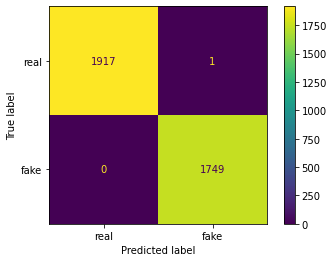

Testing the model on the test set
Classification Metrics for the test set is:

              precision    recall  f1-score   support

        real       1.00      1.00      1.00       101
        fake       1.00      1.00      1.00        93

    accuracy                           1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



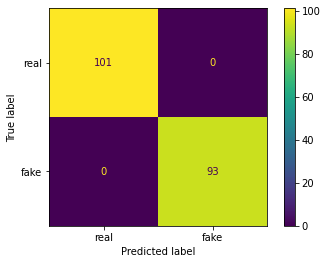

(3667, 38439)
(194, 38439)
(3667,)
(194,)


In [20]:
if TRAIN_MODEL:
    fakenews.train_model()

###  Prediction

In [21]:
fakenews.test_news(TESTFILE)

Predicted result is available in  C:\Users\Vishnu Sai\Desktop\24hours-ai-challenge\samplesubmission2\fake_news_test_output.csv


#### API input
| Field | Description | Example |
| :- | :- | :- |
| news_text | News text from the article | "BGMI not Banned In India; Here's What Google And Krafton Said" |

Example json 
```
{ 
    "news_text": "BGMI not Banned In India; Here's What Google And Krafton Said"
}
```

#### API output
| Field | Description | Example |
|:-- | :-- | :-- |
| news_text | News text from the article | "BGMI not Banned In India; Here's What Google And Krafton Said" |
|label | If the value is 'fake' it is Fake news.If the value is 'real' it is real news |"real"|
|probability | Confidence level of prediction |"0.79"|

Example json
```
{
    "label": "fake",
    "news_text": "BGMI not Banned In India; Here's What Google And Krafton Said",
    "probability": 0.79
}
```

In [5]:
if EXPOSE_AS_API:
    api=FakeNewsApiService()
    api.start()

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Aug/2022 12:13:49] "POST /predict HTTP/1.1" 200 -


This is a starter notebook for FakeNewsDetection using 'LogisticRegressionCV' model. More detailed code can be found in the **'FakeNewsDetection-analysis.ipynb'** notebook in the current directory.